<a href="https://colab.research.google.com/github/HHun1/big/blob/main_8/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

In [1]:
import pandas as pd
import numpy as np

trainCsv = './titanic-train.csv'
train = pd.read_csv(trainCsv)

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,915.000000,915.000000,915.000000,738.000000,915.000000,915.000000,915.000000
mean,458.000000,0.360656,2.292896,29.970867,0.496175,0.401093,33.479636
std,264.282046,0.480453,0.833846,14.265054,1.017751,0.915344,52.412093
min,1.000000,0.000000,1.000000,0.333300,0.000000,0.000000,0.000000
25%,229.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,458.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,686.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.331250
max,915.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          713
Embarked         1
dtype: int64

In [6]:
train["Gender"] = train["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [8]:
train["Age"].fillna(train["Age"].mean(), inplace=True)

In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          713
Embarked         1
dtype: int64

In [10]:
y_target = train["Survived"].values
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
X_input = train[list(columns)].values

In [11]:
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
clf_train = clf_train.fit(X_input, y_target)
clf_train.score(X_input, y_target)

0.8163934426229508

In [36]:
from six import StringIO
with open("./titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [35]:
!dot -Tpng ./titanic.dot -o ./titanic.png

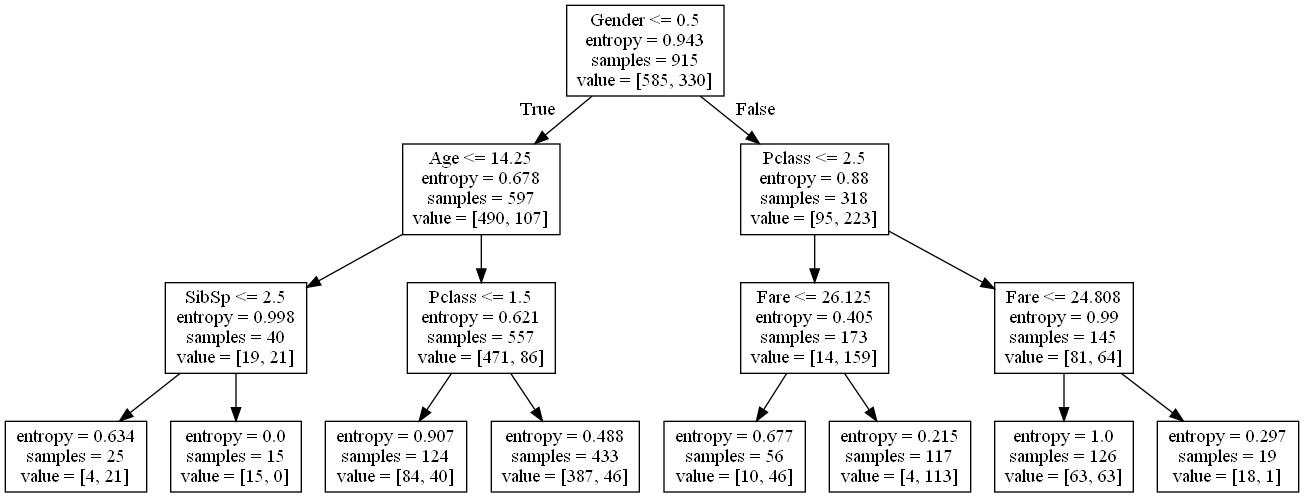

In [14]:
from IPython.display import Image

Image("./titanic.png")

Part 2

In [15]:
test = pd.read_csv('./titanic-test.csv')
len(test)

393

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


In [17]:
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,393.000000,393.000000,393.00000,307.000000,393.000000,393.000000,393.000000
mean,1112.000000,0.432570,2.29771,29.565690,0.506361,0.348601,32.866719
std,113.593574,0.496064,0.84842,14.702968,1.097579,0.737553,50.267498
min,916.000000,0.000000,1.00000,0.166700,0.000000,0.000000,0.000000
25%,1014.000000,0.000000,1.00000,20.250000,0.000000,0.000000,7.925000
50%,1112.000000,0.000000,3.00000,27.000000,0.000000,0.000000,15.045800
75%,1210.000000,1.000000,3.00000,38.000000,1.000000,0.000000,31.000000
max,1308.000000,1.000000,3.00000,80.000000,8.000000,5.000000,512.329200


In [18]:
test["Gender"] = test["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [19]:
test.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


In [20]:
test["Age"].fillna(test["Age"].mean(), inplace=True)

In [21]:
test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          300
Embarked         1
dtype: int64

In [22]:
X_input = test[list(columns)].values
target_labels = clf_train.predict(X_input)

In [23]:
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':test['Name']})
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [24]:
import numpy as np

all_data = pd.read_csv("./titanic_all.csv")

testing_results = pd.merge(target_labels, all_data[['Name', 'Survived']], on=['Name'])
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
print(acc)

0.7588832487309645


Part 3

In [25]:
all_data = pd.read_csv("./titanic_all.csv", usecols=['Survived', 'Pclass', 'Gender','Age','SibSp','Fare'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


In [26]:
all_data.isna().sum()

Survived      0
Pclass        0
Gender        0
Age         263
SibSp         0
Fare          0
dtype: int64

In [27]:
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


In [28]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   int64  
 3   Age       1308 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 61.4 KB


In [30]:
from sklearn.model_selection import train_test_split

X = all_data[list(columns)].values
y = all_data["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

In [31]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf_train = clf_train.fit(X_train, y_train)

In [32]:
train_score = str(clf_train.score(X_train, y_train))
test_score = str(clf_train.score(X_test, y_test))

print('Training score = '+ train_score + ' Testting score = '+test_score)

Training score = 0.8201530612244898 Testting score = 0.8053435114503816
